In [270]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [302]:
# テストデータ
w = np.arange(1, 4).reshape(3, 1)
x = np.arange(3 * 200).reshape(-1, 3)
x_std = np.std(x)
x_avg = np.mean(x)
x = (x - x_avg) / x_std
y = x @ w

# Functional API の導入
keras には Sequential 以外のモデリング方法もある

In [272]:
input_a = tf.keras.layers.Input(shape=(3,))
x_a = input_a
x_a = tf.keras.layers.Dense(3)(x_a)
x_a = tf.keras.layers.Dense(3)(x_a)
x_a = tf.keras.layers.Dense(1)(x_a)

model = tf.keras.Model(inputs=[input_a], outputs=[x_a])
model.compile(loss="mse")

In [273]:
res = model.fit(x, y, epochs=100)

Train on 200 samples
Epoch 1/100
200/200 [==============================] - 0s 2ms/sample - loss: 39.2406
Epoch 2/100
200/200 [==============================] - 0s 147us/sample - loss: 38.4304
Epoch 3/100
200/200 [==============================] - 0s 122us/sample - loss: 37.7872
Epoch 4/100
200/200 [==============================] - 0s 119us/sample - loss: 37.1915
Epoch 5/100
200/200 [==============================] - 0s 123us/sample - loss: 36.6248
Epoch 6/100
200/200 [==============================] - 0s 118us/sample - loss: 36.0751
Epoch 7/100
200/200 [==============================] - 0s 119us/sample - loss: 35.5361
Epoch 8/100
200/200 [==============================] - 0s 129us/sample - loss: 34.9728
Epoch 9/100
200/200 [==============================] - 0s 109us/sample - loss: 34.4387
Epoch 10/100
200/200 [==============================] - 0s 129us/sample - loss: 33.8677
Epoch 11/100
200/200 [==============================] - 0s 108us/sample - loss: 33.3276
Epoch 12/100
200/200 [

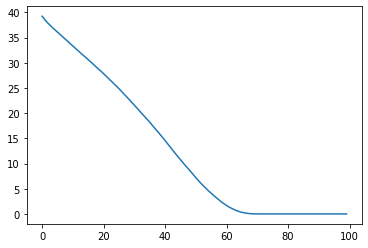

In [274]:
plt.plot(res.history["loss"])

# 多入力多出力モデル
Functional 方式は Sequential よりも柔軟な表現力がある

In [288]:
w = np.arange(1, 4).reshape(3, 1)
x = np.arange(3 * 200).reshape(-1, 3)
x_std = np.std(x)
x_avg = np.mean(x)
x = (x - x_avg) / x_std
y = x @ w

In [324]:
input_a = tf.keras.layers.Input(shape=(3,))
input_b = tf.keras.layers.Input(shape=(3,))

x_a = input_a
x_a = tf.keras.layers.Dense(3)(x_a)
x_a = tf.keras.layers.Dense(3)(x_a)

x_b = input_b
x_b = tf.keras.layers.Dense(3)(x_b)
x_b = tf.keras.layers.Dense(3)(x_b)

x_c = tf.keras.layers.Concatenate()([x_a, x_b])
x_c = tf.keras.layers.Dense(3)(x_c)
x_c = tf.keras.layers.Dense(3)(x_c)
x_c = tf.keras.layers.Dense(1)(x_c)

x_d1 = tf.keras.layers.Dense(1)(x_c)
x_d2 = tf.keras.layers.Dense(1)(x_c)

model = tf.keras.Model(inputs=[input_a, input_b], outputs=[x_d1, x_d2])
model.compile(loss=["mse", "binary_crossentropy"])

In [320]:
res = model.fit([x, x], [y, y], epochs=100)

Train on 200 samples
Epoch 1/100
200/200 [==============================] - 1s 4ms/sample - loss: -0.3722 - dense_119_loss: 25.3690 - dense_120_loss: -25.3194
Epoch 2/100
200/200 [==============================] - 0s 264us/sample - loss: -5.1360 - dense_119_loss: 23.8943 - dense_120_loss: -32.5476
Epoch 3/100
200/200 [==============================] - 0s 229us/sample - loss: -7.7776 - dense_119_loss: 22.4276 - dense_120_loss: -27.4000
Epoch 4/100
200/200 [==============================] - 0s 260us/sample - loss: -10.3793 - dense_119_loss: 19.4695 - dense_120_loss: -29.8197
Epoch 5/100
200/200 [==============================] - 0s 225us/sample - loss: -12.7097 - dense_119_loss: 19.1250 - dense_120_loss: -30.1496
Epoch 6/100
200/200 [==============================] - 0s 247us/sample - loss: -15.2221 - dense_119_loss: 17.0688 - dense_120_loss: -30.3315
Epoch 7/100
200/200 [==============================] - 0s 227us/sample - loss: -17.6995 - dense_119_loss: 15.8568 - dense_120_loss: -33.77

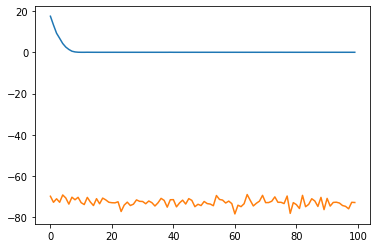

In [301]:
plt.plot(res.history["dense_110_loss"])
plt.plot(res.history["dense_111_loss"])

# より高度なモデルを作る

* Inception モジュール: 並走するグラフ
* 残差接続: グラフショートカットの加算
* 重み共有: レイヤーを使い回すと重みが共有される
* pw 畳み込み: カーネルサイズ 1\*1\*c の畳み込み。チャネル数調整に使用でき、 Inception で頻出する
* dw 畳み込み: 入力チャネルを跨がず層別に畳み込む (DepthwiseConv2D, SeparableConv2D)
* バッチ正規化
* モデルのアンサンブル: 複数モデルを組み合わせる。表層学習と深層学習の双方の出力から判断するなど

# コールバックを使う
* EarlyStopping: メトリクスを指定し監視させる。スコアが良くならなければ学習を停止させる
* ModelCheckpoint: エポック毎に重みを保存する
* ReduceLROnPlateau: 学習率を小さくしていく

In [358]:
from tensorflow.keras import callbacks

In [405]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x[:, :, :, np.newaxis] / 255
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)

test_x = test_x[:, :, :, np.newaxis] / 255
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [453]:
# monitor: 監視対象のメトリクス
# patience: 指定回数に渡って監視対象の改善が無ければコールバック発動
# factor: コールバック発動時に学習率へ掛ける係数
callback_list = [
    callbacks.EarlyStopping(monitor="val_acc", patience=2),
    callbacks.ModelCheckpoint(filepath="./checkpoints/weights.hdf5", save_best_only=True),
    callbacks.ReduceLROnPlateau(factor=0.1, patience=10)
]

In [457]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["acc"])

In [458]:
res = model.fit(
    train_x, train_y, batch_size=256, epochs=20,
    callbacks=callback_list, validation_data=(test_x, test_y))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5262 - acc: 0.8404 - val_loss: 0.2460 - val_acc: 0.9239
Epoch 2/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1553 - acc: 0.9542 - val_loss: 0.1318 - val_acc: 0.9577
Epoch 3/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1002 - acc: 0.9703 - val_loss: 0.2354 - val_acc: 0.9278
Epoch 4/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0753 - acc: 0.9769 - val_loss: 0.0670 - val_acc: 0.9787
Epoch 5/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0610 - acc: 0.9815 - val_loss: 0.0608 - val_acc: 0.9805
Epoch 6/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0507 - acc: 0.9844 - val_loss: 0.0534 - val_acc: 0.9839
Epoch 7/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0436 - acc: 0.9868 - val_loss: 0.

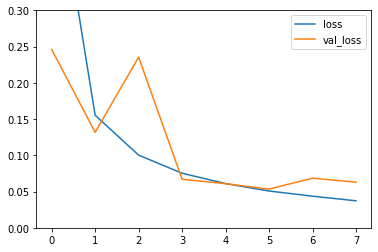

In [459]:
plt.plot(res.history["loss"], label="loss")
plt.plot(res.history["val_loss"], label="val_loss")
plt.ylim(0.0, 0.3)
plt.legend()